In [1]:
import numpy as np
import pandas as pd
Incident=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Incident data Last 3 years.csv")
Mobilisation=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Mobilisation data Last 3 years.csv", sep=';')

In [2]:
Mobilisation.drop(['CalYear','HourOfCall'], axis=1,inplace=True)
Final=Incident.merge(right=Mobilisation, on='IncidentNumber')
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          558176 non-null  object 
 1   DateOfCall                              558176 non-null  object 
 2   CalYear                                 558176 non-null  int64  
 3   TimeOfCall                              558176 non-null  object 
 4   HourOfCall                              558176 non-null  int64  
 5   IncidentGroup                           558176 non-null  object 
 6   StopCodeDescription                     558176 non-null  object 
 7   SpecialServiceType                      129068 non-null  object 
 8   PropertyCategory                        558176 non-null  object 
 9   PropertyType                            558176 non-null  object 
 10  AddressQualifier                        5581

In [3]:
Final.drop(['DateAndTimeReturned','Postcode_full','UPRN','USRN','IncGeo_BoroughName','IncGeo_WardName','Easting_m',
           'Northing_m','Latitude','Longitude','FRS','PlusCode_Code','PlusCode_Description'], axis=1,inplace=True)

In [4]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 45 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          558176 non-null  object 
 1   DateOfCall                              558176 non-null  object 
 2   CalYear                                 558176 non-null  int64  
 3   TimeOfCall                              558176 non-null  object 
 4   HourOfCall                              558176 non-null  int64  
 5   IncidentGroup                           558176 non-null  object 
 6   StopCodeDescription                     558176 non-null  object 
 7   SpecialServiceType                      129068 non-null  object 
 8   PropertyCategory                        558176 non-null  object 
 9   PropertyType                            558176 non-null  object 
 10  AddressQualifier                        5581

In [5]:
Final['Date']=pd.to_datetime(Final.DateOfCall)
Final.drop('DateOfCall', axis=1, inplace=True)
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 45 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          558176 non-null  object        
 1   CalYear                                 558176 non-null  int64         
 2   TimeOfCall                              558176 non-null  object        
 3   HourOfCall                              558176 non-null  int64         
 4   IncidentGroup                           558176 non-null  object        
 5   StopCodeDescription                     558176 non-null  object        
 6   SpecialServiceType                      129068 non-null  object        
 7   PropertyCategory                        558176 non-null  object        
 8   PropertyType                            558176 non-null  object        
 9   AddressQualifier                     

In [6]:
Final['Borough']=Final['IncGeo_BoroughCode']+' -' +Final['ProperCase']
Final['Ward']=Final['IncGeo_WardCode']+' -' +Final['IncGeo_WardNameNew']
Final.drop(['IncGeo_BoroughCode','ProperCase','IncGeo_WardNameNew','IncGeo_WardCode'], axis=1, inplace=True)
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          558176 non-null  object        
 1   CalYear                                 558176 non-null  int64         
 2   TimeOfCall                              558176 non-null  object        
 3   HourOfCall                              558176 non-null  int64         
 4   IncidentGroup                           558176 non-null  object        
 5   StopCodeDescription                     558176 non-null  object        
 6   SpecialServiceType                      129068 non-null  object        
 7   PropertyCategory                        558176 non-null  object        
 8   PropertyType                            558176 non-null  object        
 9   AddressQualifier                     

In [7]:
TypeIncident=Final['IncidentGroup']+' - ' +Final['StopCodeDescription']
Final=Final.join(pd.get_dummies(TypeIncident, prefix='TypeInc'))

In [8]:
Final['DelayCodeId'].replace([3,5,6,7,8,9,10,11,12,13],
                           ['At drills when mobilised','Address incomplete/wrong','Appliance/Equipment defect',
                            'Arrived but held up - Other reason','Traffic calming measures','Traffic, roadworks, etc',
                            'Weather conditions','Mob/Radio problems when mobilised','Not held up',
                            'On outside duty when mobilised'],inplace=True)
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 52 columns):
 #   Column                                                    Non-Null Count   Dtype         
---  ------                                                    --------------   -----         
 0   IncidentNumber                                            558176 non-null  object        
 1   CalYear                                                   558176 non-null  int64         
 2   TimeOfCall                                                558176 non-null  object        
 3   HourOfCall                                                558176 non-null  int64         
 4   IncidentGroup                                             558176 non-null  object        
 5   StopCodeDescription                                       558176 non-null  object        
 6   SpecialServiceType                                        129068 non-null  object        
 7   PropertyCategory             

In [9]:
Final_test=Final
Final_test.drop(['TimeOfCall','IncidentGroup','StopCodeDescription','SpecialServiceType','DateAndTimeMobilised',
                'DateAndTimeMobile','DateAndTimeArrived','Ward','Postcode_district','DateAndTimeLeft'], axis=1, inplace=True)
Final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 42 columns):
 #   Column                                                    Non-Null Count   Dtype         
---  ------                                                    --------------   -----         
 0   IncidentNumber                                            558176 non-null  object        
 1   CalYear                                                   558176 non-null  int64         
 2   HourOfCall                                                558176 non-null  int64         
 3   PropertyCategory                                          558176 non-null  object        
 4   PropertyType                                              558176 non-null  object        
 5   AddressQualifier                                          558176 non-null  object        
 6   Easting_rounded                                           558176 non-null  int64         
 7   Northing_rounded             

In [10]:
PropCateg=Final_test['PropertyCategory']
Final_test=Final_test.join(pd.get_dummies(PropCateg, prefix='PropCateg'))
AddressQu=Final_test['AddressQualifier']
Final_test=Final_test.join(pd.get_dummies(AddressQu, prefix='AddressQu'))
Final_test.drop(['PropertyType','PropertyCategory','AddressQualifier','ResourceMobilisationId','DelayCode_Description'], 
                axis=1, inplace=True)
Final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 57 columns):
 #   Column                                                     Non-Null Count   Dtype         
---  ------                                                     --------------   -----         
 0   IncidentNumber                                             558176 non-null  object        
 1   CalYear                                                    558176 non-null  int64         
 2   HourOfCall                                                 558176 non-null  int64         
 3   Easting_rounded                                            558176 non-null  int64         
 4   Northing_rounded                                           558176 non-null  int64         
 5   IncidentStationGround                                      558174 non-null  object        
 6   FirstPumpArriving_AttendanceTime                           558175 non-null  float64       
 7   FirstPumpArriving_De

In [11]:
Final_test['PerformanceReporting'].replace(['1','2','Not Used'],[1,2,3],inplace=True)
Final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558176 entries, 0 to 558175
Data columns (total 57 columns):
 #   Column                                                     Non-Null Count   Dtype         
---  ------                                                     --------------   -----         
 0   IncidentNumber                                             558176 non-null  object        
 1   CalYear                                                    558176 non-null  int64         
 2   HourOfCall                                                 558176 non-null  int64         
 3   Easting_rounded                                            558176 non-null  int64         
 4   Northing_rounded                                           558176 non-null  int64         
 5   IncidentStationGround                                      558174 non-null  object        
 6   FirstPumpArriving_AttendanceTime                           558175 non-null  float64       
 7   FirstPumpArriving_De

C:\Users\agrabia\AppData\Local\Temp\ipykernel_17332\1948314942.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Final_test.corr(),annot=True,cmap='RdBu_r',center=0);


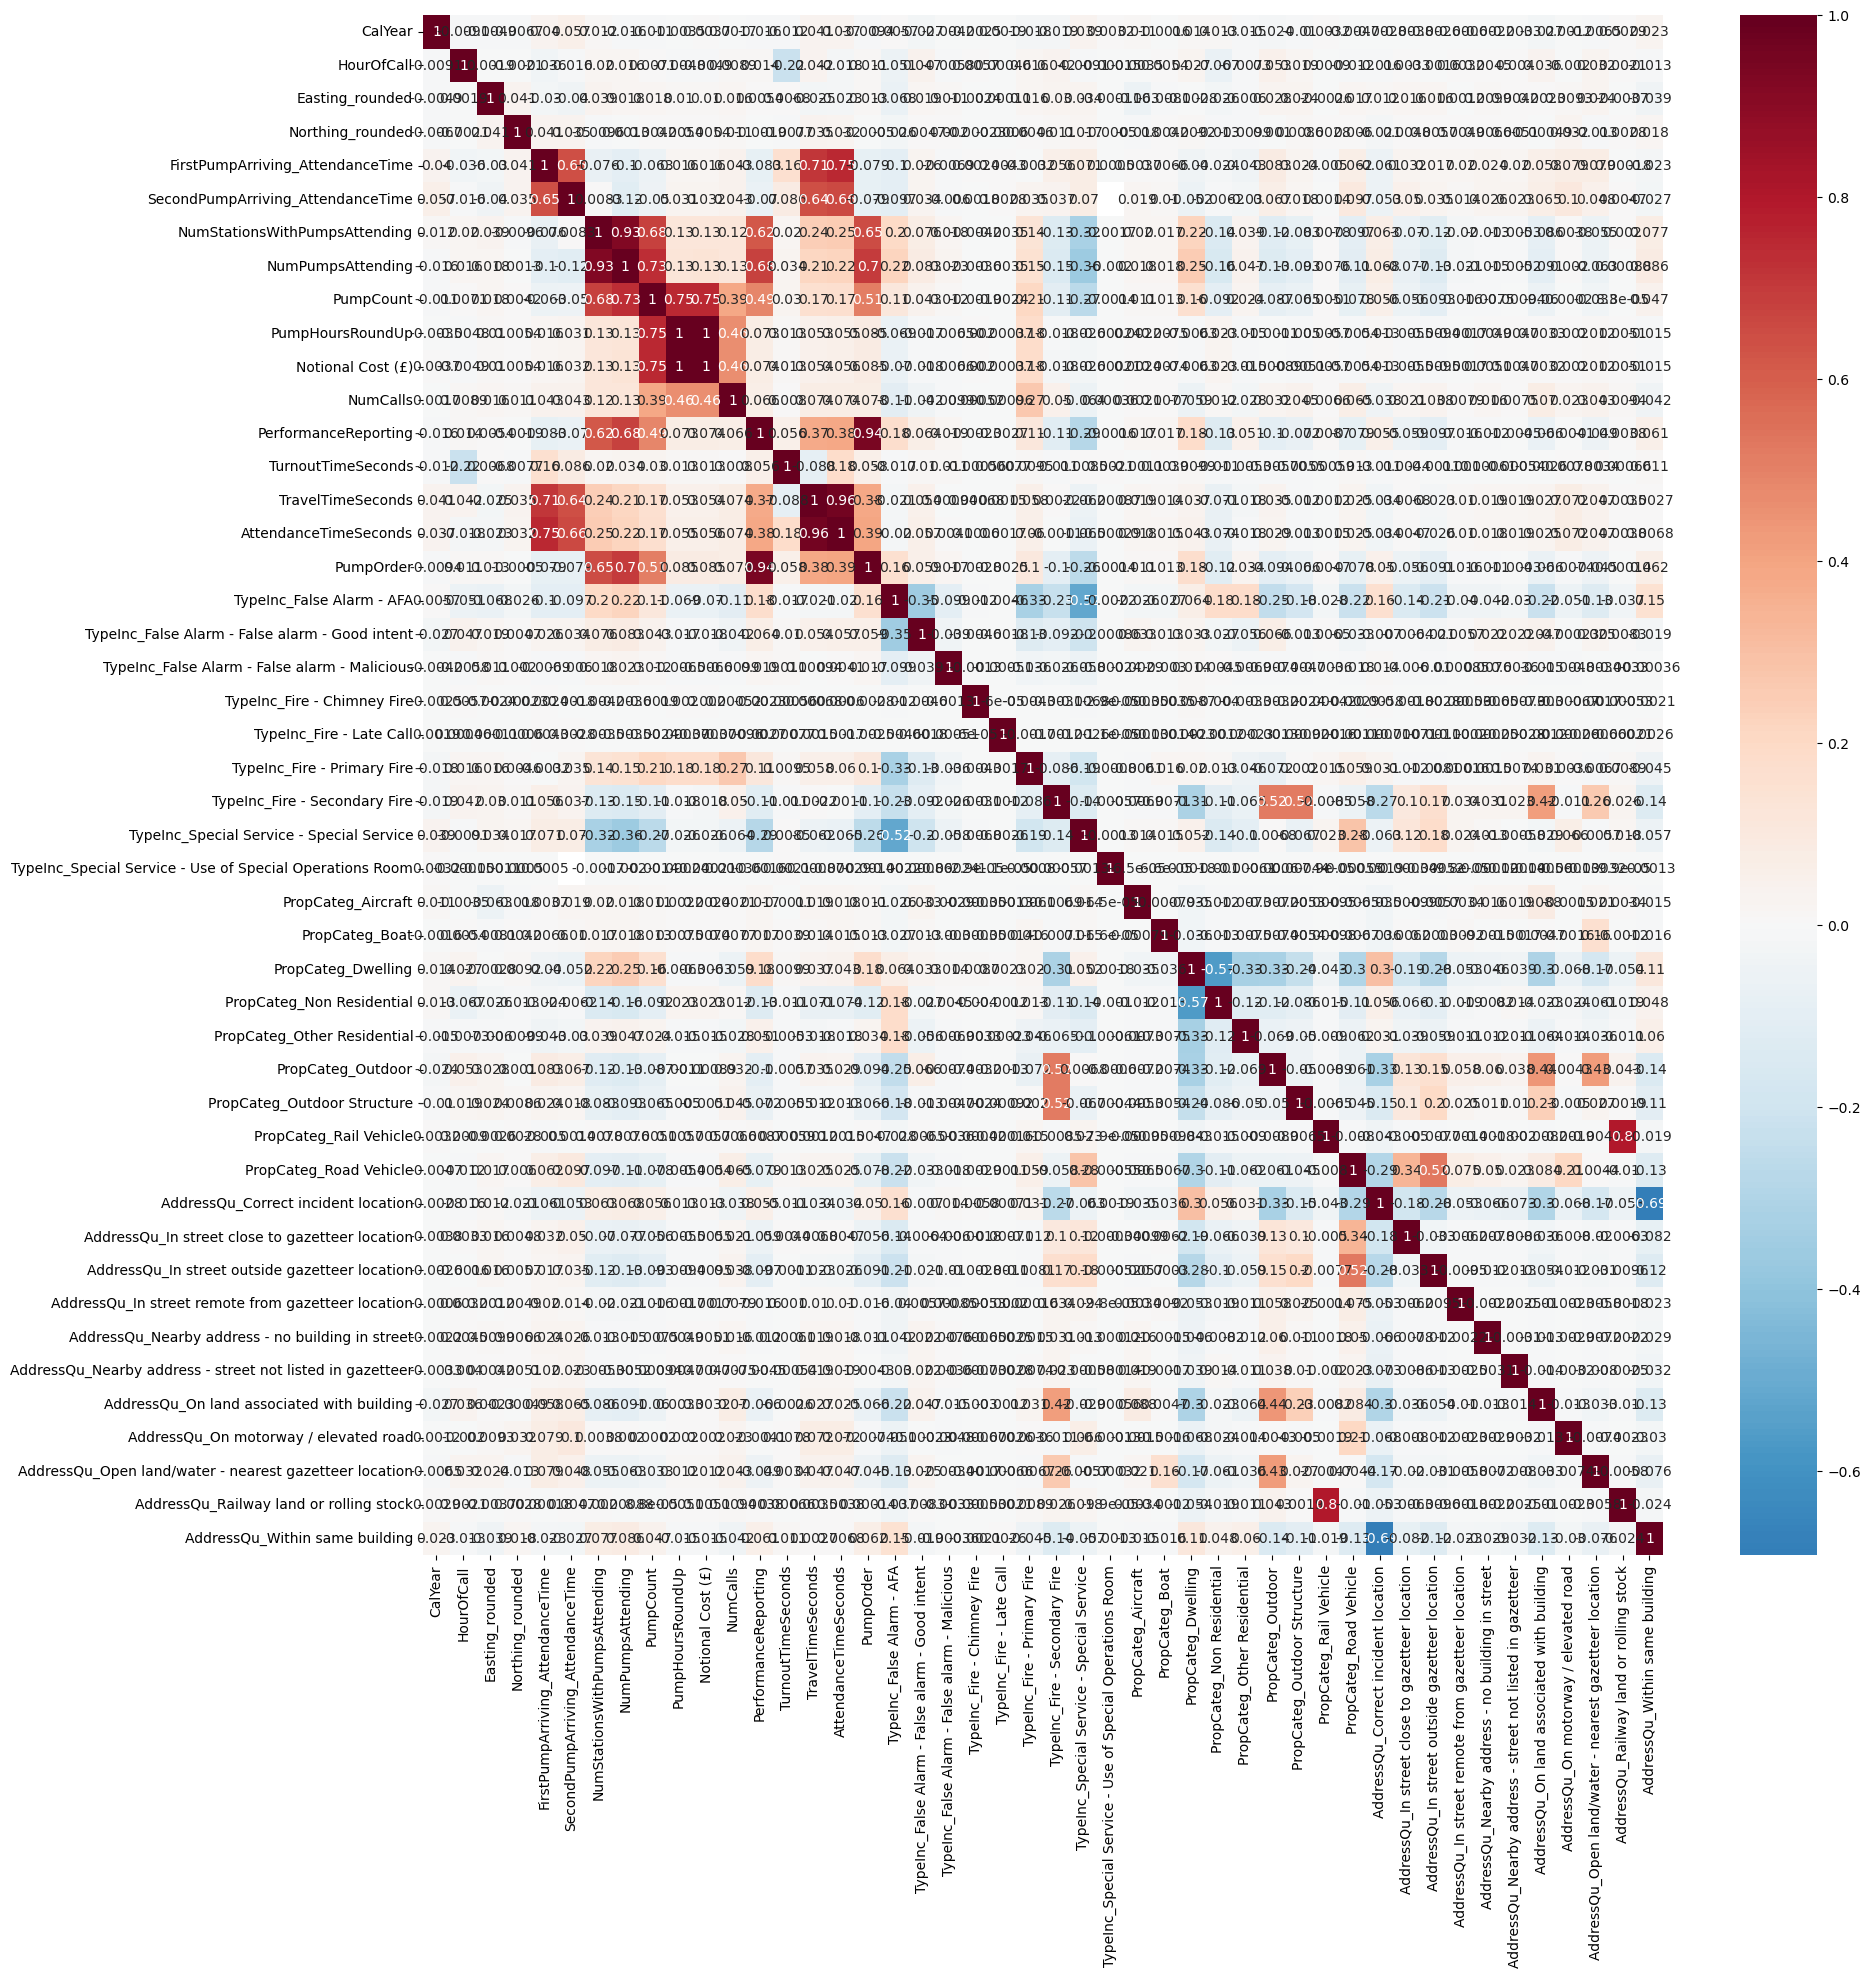

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(Final_test.corr(),annot=True,cmap='RdBu_r',center=0);

1           359042
2           139168
Not Used     59966
Name: PerformanceReporting, dtype: int64